In [199]:
import numpy as np
import pandas as pd
import scanpy as sc
#import matplotlib.pyplot as plt
#import seaborn as sns

In [200]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.2 scikit-learn==1.2.0 statsmodels==0.13.5 python-igraph==0.10.3 pynndescent==0.5.8


In [201]:
#CHANGE THIS
results_file = 'write/Hir_992.h5ad'  # the file that will store the analysis results

In [202]:
#CHANGE THIS
adata = sc.read_10x_mtx(
    r'C:\Users\zchua\Documents\Hir_scRNAseq_output\992_output\filtered_feature_bc_matrix', # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache\C-Users-zchua-Documents-Hir_scRNAseq_output-992_output-filtered_feature_bc_matrix-matrix.h5ad


In [203]:
sc.pp.filter_cells(adata, min_genes=300) #filters out cells with less than 300 genes
sc.pp.filter_genes(adata, min_cells=3) #filter out genes in less than 3 cells

filtered out 83 cells that have less than 300 genes expressed
filtered out 8866 genes that are detected in less than 3 cells


In [204]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

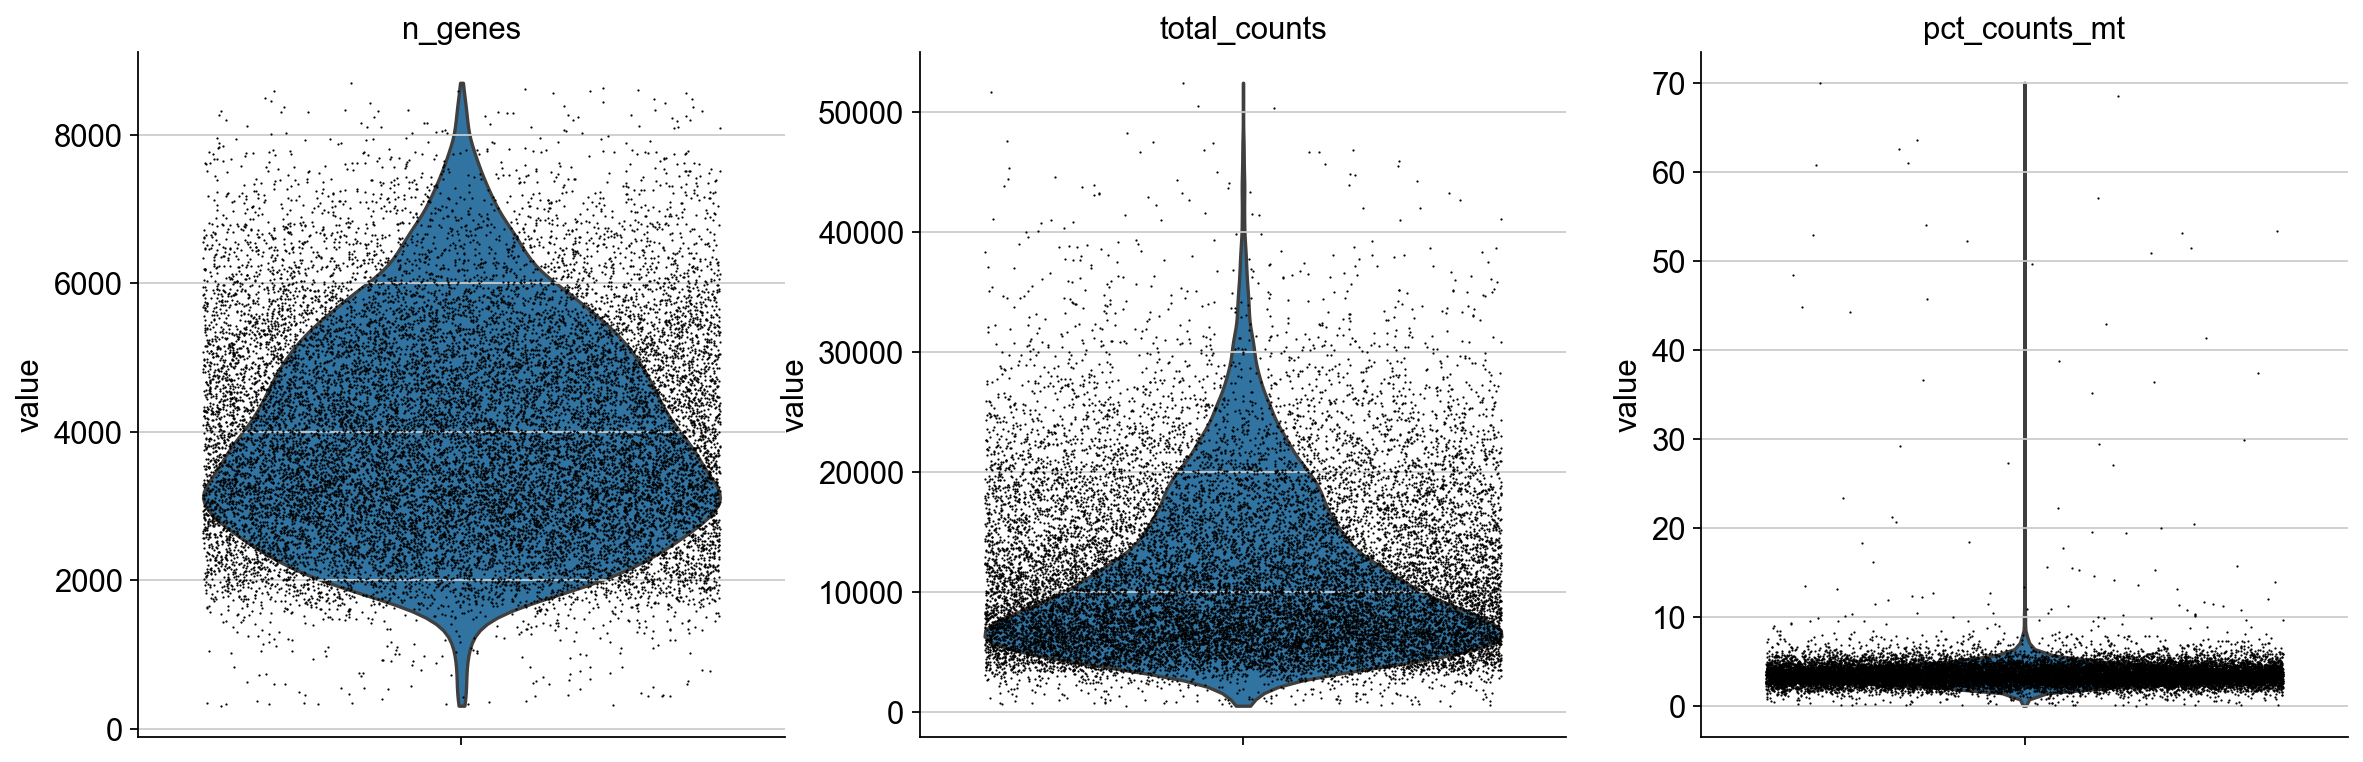

In [205]:
sc.pl.violin(adata, ['n_genes', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [206]:
adata = adata[adata.obs.pct_counts_mt < 6, :]

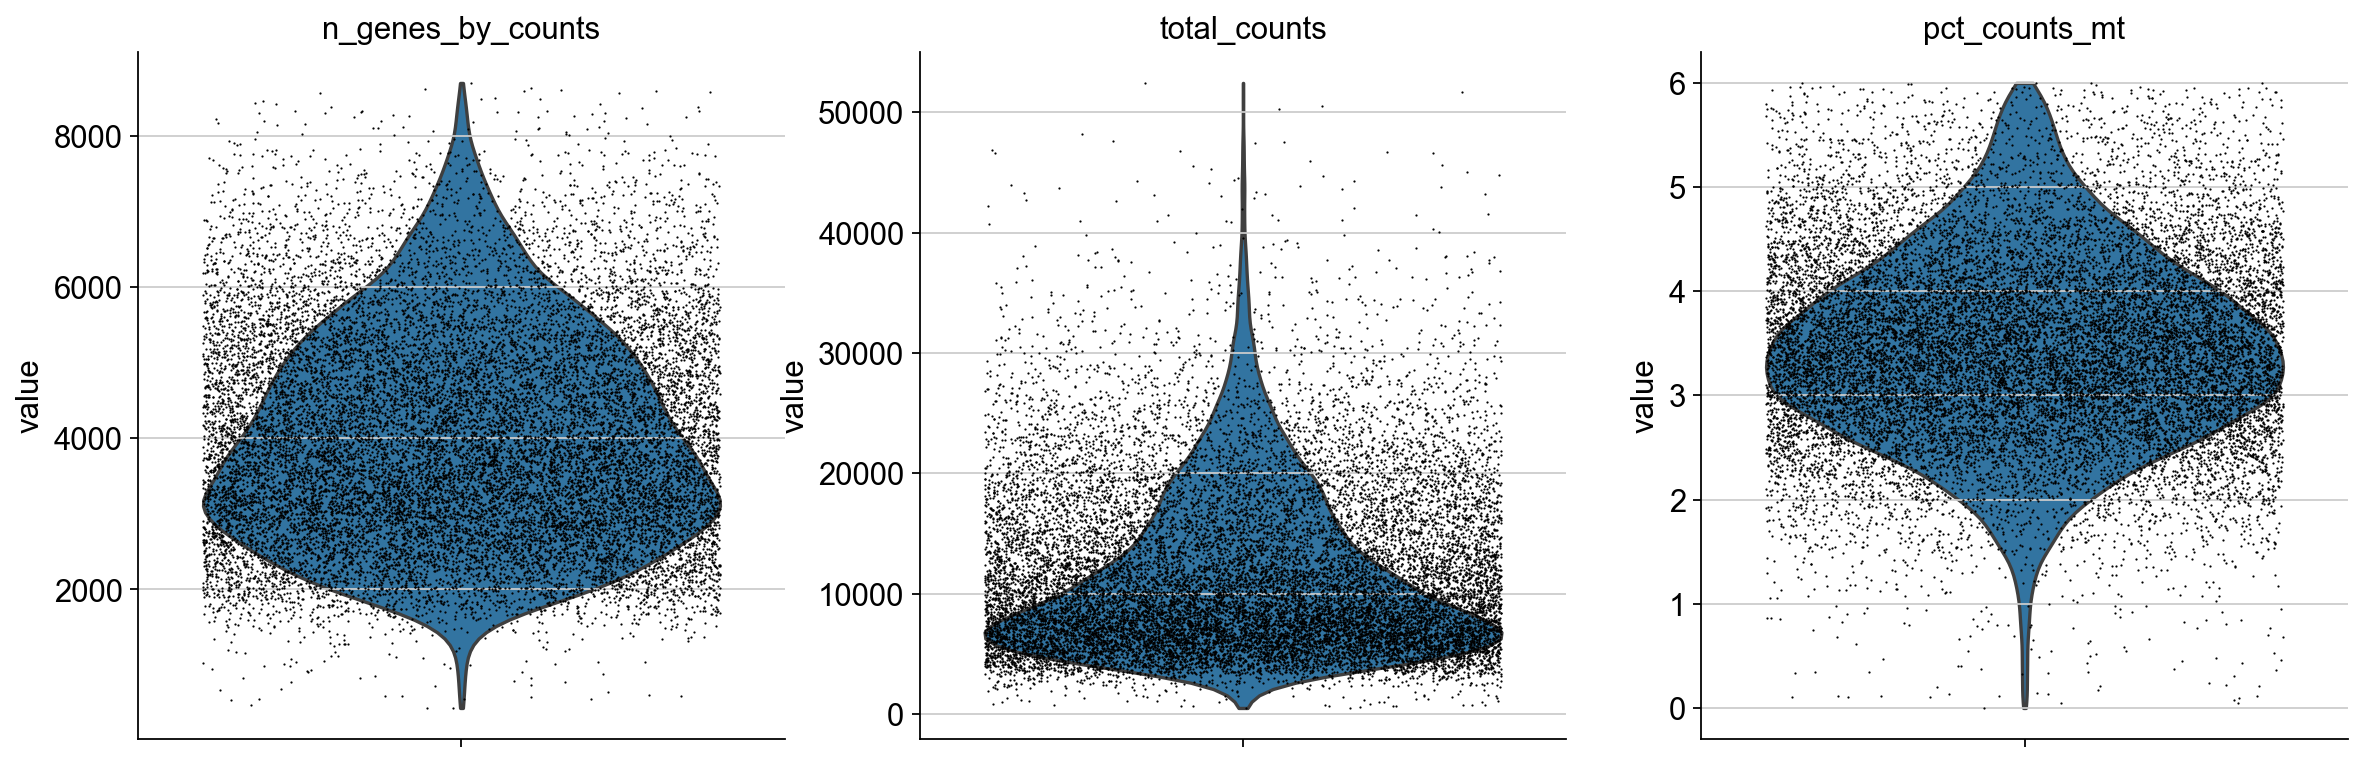

In [207]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [208]:
sc.pp.normalize_total(adata, target_sum=1e4)

C:\Users\zchua\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [209]:
sc.pp.log1p(adata)

In [210]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


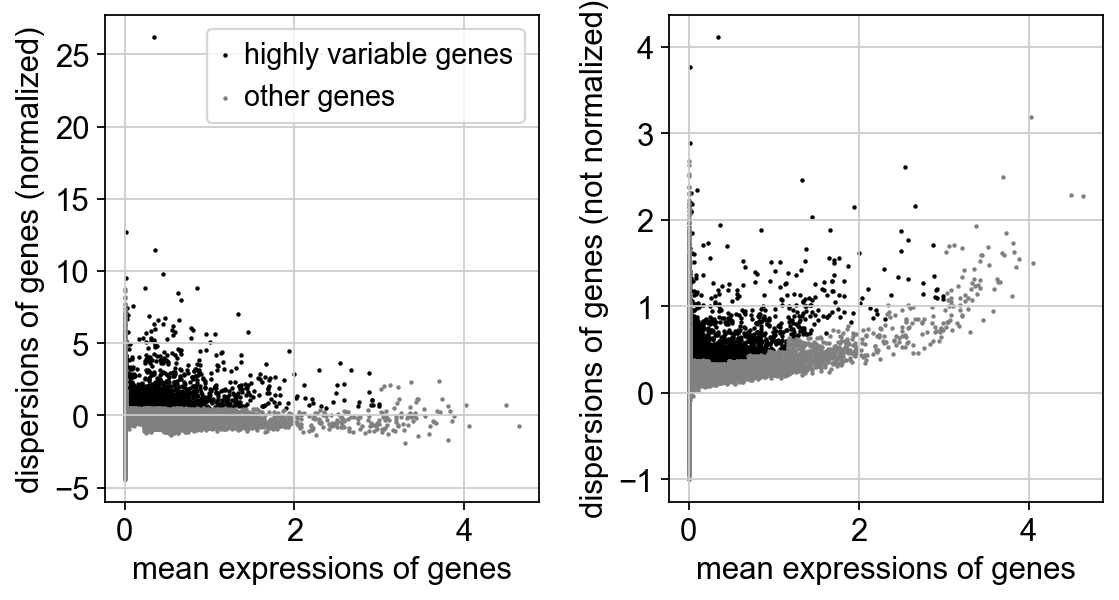

In [211]:
sc.pl.highly_variable_genes(adata)

In [212]:
adata = adata[:, adata.var.highly_variable] #filteringadata.write(results_file)

In [213]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) #Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Scale the data to unit variance.

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:37)


In [214]:
sc.pp.scale(adata, max_value=10) #Scale each gene to unit variance. Clip values exceeding standard deviation 10.

In [215]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)


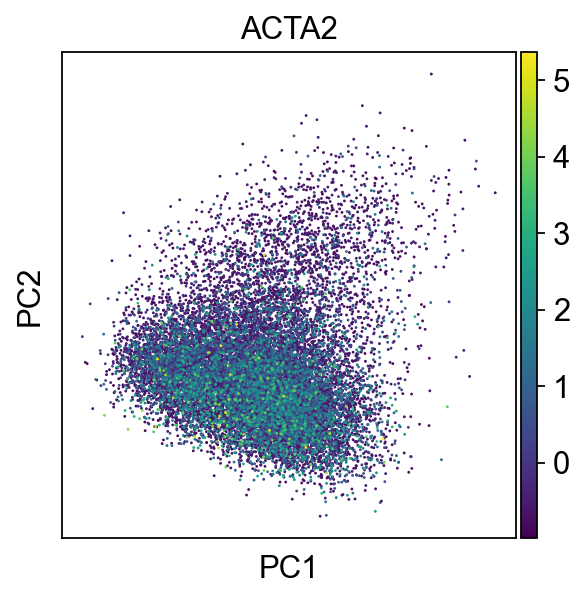

In [216]:
sc.pl.pca(adata, color='ACTA2')

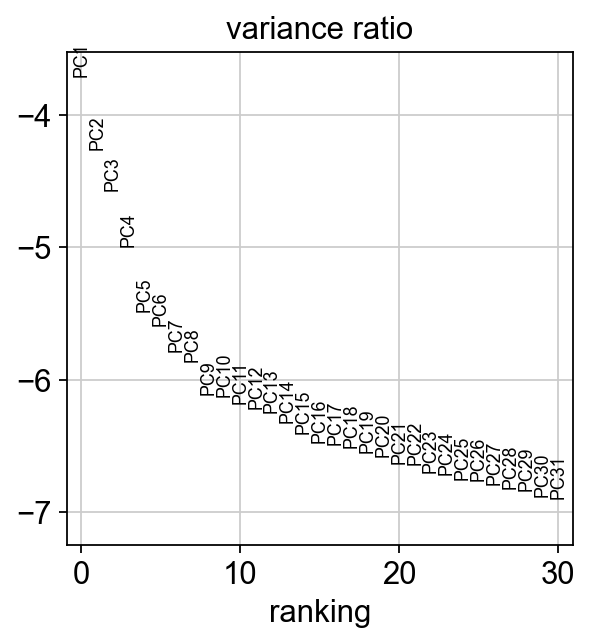

In [217]:
sc.pl.pca_variance_ratio(adata, log=True)